# Lo scopo dell esercizio e implementazione di una soluzione

#### Lo scopo del esercizio:
L’obiettivo di questa challenge è costruire una tariffa per Prima Assicurazioni, ovvero un modello che riceva in input un set di parametri e restituisca come output il prezzo ottimale da offrire a un cliente. La tariffa che si deve costruire ha lo scopo di massimizzare il profitto che Prima Assicurazioni genera dalla sua attività, misurato come totale dei premi incassati meno totale dei sinistri liquidati.


#### La mia proposta e il mio metodo di arrivare alla proposta
1. Nel inizio di questo file ho fatto import dei framework che sarano uttilizati durante il challenge e ho caricato i CSV file salvati come Pandas dataframe
2. Come ogni problema nel ambito di data science, prima bisogna capire che tipo di dati abbiamo in posesso, quindi vedere quali sono i feature, la distribuzione dei valori per i feature, se ci sono dati mancanti su alcuni feature e quali sono i data type dei feature sul dataset.
3. Il prossimo step è di transformare i data dentro i tre dataset "quotazioni_storiche", "quotazioni" e "storico_rischi" per gestire tutti i vallori mancanti, encodare i vari feature con vallori string, separare i feature con vallori "date" su tre diversi feature "day", "month" e "year".
4. Al fine è arrivato il tempo di creare i modeli di regressione e per essere in grado di trovare il "best price" per i clienti che sono presenti nel dataframe "quotazioni", prima devo creare un ML model che puo trovare il "risk" del cliente, cosi avremo il rischio del cliente e lo possiamo uttilizare nella nostra predizione del "best_price".
5. Creare un modelo ML e testarlo sul dataframe "storico_rischi" dove la variabile dipendente è "risk"
6. Uttilizare il modelo ML precedente creato sul dataframe "quotazioni_storiche" per trovare il rischio per le polise nel dataframe e al fine ho aggiunto il feature "predicted_risk"
7. Creare un altro modelo ML e testarlo sul dataframe "quotazioni_storiche" dove la variabile dipendente è "best_price"
8. Uttilizare il primo modelo ML creato e testato sul dataframe "storico_rischi" per trovare il rischio per le polise nel dataframe "quotazioni", questo risultato va aggiunto come un feature "predicted_risk" nel dataframe "quotazioni"
9. Uttilizare il secondo modelo ML creato e testato sul dataframe "quotazioni_storiche" per trovare il prezzo migliore per le polise nel dataframe "quotazioni", che è anche il nostro risultato desiderato.

# 1. Import frameworks

In [1]:
import pandas as pd # Per operazioni con le dataframe
import numpy as np # Per operazioni matematici
import seaborn as sns # Per crazione dei grafici
from sklearn import preprocessing # Per encoding dei feature
label_encode = preprocessing.LabelEncoder() # Per encoding dei feature
from sklearn import model_selection # Per creazione dei modeli ML
from sklearn.model_selection import train_test_split # Per creazione dei modeli ML
from sklearn.ensemble import RandomForestRegressor # Per creazione dei modeli ML
from sklearn.metrics import mean_squared_log_error # Per verificare il performance del nostro modelo

# 2. Caricamento data

In [2]:
def import_csv_file(path):
    data_CSV = pd.read_csv(path)
    return data_CSV

In [3]:
quotazioni_storiche = import_csv_file("quotazioni storiche con bestprice.csv")
quotazioni = import_csv_file("quotazioni.csv")
storico_rischi = import_csv_file("storico rischi.csv")

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# 3. Una semplice exploratory data analysis sui dataframe "quotazioni_storiche" e "storico_rischi"

In [4]:
# Vediamo le prime 5 righe der dataframe
quotazioni_storiche.head()

,data_quote,data_decorrenza_richiesta,tipo_guida,insurance_type,contr_birth_date,contr_license_year,contr_marital_status,contr_occupation,contr_res_prov,contr_res_region_name,...,veh_consumption,veh_kw_group,veh_height,veh_length,veh_width,veh_mass,veh_mileage_cpt,pol_classe_cu,atr_claims,best_price
0,2020-03-04,2020-03-15,expert,B,1970-01-01,1988.0,married_with_kids,Impiegato / Quadro / Dirigente,MI,Lombardia,...,6.7,70,1498,4336,1792,1280.0,10,1,0,455.46
1,2020-02-20,2020-03-16,expert,B,1975-01-01,1993.0,married_with_kids,Operaio,BO,Emilia-Romagna,...,5.6,90,1635,4440,1855,1490.0,10,1,0,523.36
2,2020-02-10,2020-02-21,expert,B,1973-01-01,1991.0,single,Impiegato / Quadro / Dirigente,UD,Friuli-Venezia Giulia,...,5.1,90,1573,4234,1819,1270.0,10,1,0,516.91
3,2020-01-04,2020-02-07,expert,B,1955-03-01,1974.0,married_with_kids,Impiegato / Quadro / Dirigente,PD,Veneto,...,6.5,120,1488,3657,1627,1110.0,10,1,0,446.29
4,2020-02-06,2020-03-12,expert,B,1983-12-01,2001.0,married_no_kids,Operaio,RM,Lazio,...,5.2,110,1590,4385,1831,1520.0,10,6,0,783.90


In [5]:
# Quali feature hanno vallori mancanti
quotazioni_storiche.isnull().sum()

data_quote                      0
data_decorrenza_richiesta       0
tipo_guida                      0
insurance_type                  0
contr_birth_date             2448
contr_license_year           2955
contr_marital_status            0
contr_occupation                0
contr_res_prov               6889
contr_res_region_name           0
veh_registration_date           0
veh_purchase_date               0
veh_brand_name                  0
veh_doors_number                0
veh_value                       0
veh_alimentazione               0
veh_consumption                 5
veh_kw_group                    0
veh_height                      0
veh_length                      0
veh_width                       0
veh_mass                        5
veh_mileage_cpt                 0
pol_classe_cu                   0
atr_claims                      0
best_price                      0
dtype: int64

In [6]:
# Quali sono i datatype dei feature
quotazioni_storiche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307128 entries, 0 to 307127
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data_quote                 307128 non-null  object 
 1   data_decorrenza_richiesta  307128 non-null  object 
 2   tipo_guida                 307128 non-null  object 
 3   insurance_type             307128 non-null  object 
 4   contr_birth_date           304680 non-null  object 
 5   contr_license_year         304173 non-null  float64
 6   contr_marital_status       307128 non-null  object 
 7   contr_occupation           307128 non-null  object 
 8   contr_res_prov             300239 non-null  object 
 9   contr_res_region_name      307128 non-null  object 
 10  veh_registration_date      307128 non-null  object 
 11  veh_purchase_date          307128 non-null  object 
 12  veh_brand_name             307128 non-null  object 
 13  veh_doors_number           30

In [7]:
# Vediamo le prime 5 righe der dataframe
storico_rischi.head()

,data_quote,data_decorrenza_richiesta,tipo_guida,insurance_type,contr_birth_date,contr_license_year,contr_marital_status,contr_occupation,contr_res_prov,contr_res_region_name,...,veh_consumption,veh_kw_group,veh_height,veh_length,veh_width,veh_mass,veh_mileage_cpt,pol_classe_cu,atr_claims,risk
0,2020-01-23,2020-02-07,expert,B,1955-03-01,1973.0,married_no_kids,Pensionato,SA,Campania,...,5.3,60,1490,4065,1687,1105.0,10,1,0,0.00
1,2020-02-18,2020-02-24,exclusive,N,1966-02-01,1984.0,married_with_kids,Impiegato / Quadro / Dirigente,AN,Marche,...,5.7,110,1635,4355,1900,1670.0,10,14,0,0.00
2,2020-01-07,2020-01-23,exclusive,B,1969-04-01,1987.0,single,Operaio,VR,Veneto,...,6.2,70,1624,4052,1694,1369.0,10,1,0,0.00
3,2020-02-24,2020-03-22,expert,B,1948-12-01,1968.0,married_no_kids,Pensionato,RM,Lazio,...,6.0,40,1420,3337,1508,810.0,10,1,0,0.00
4,2020-02-04,2020-02-16,expert,B,1953-06-01,1972.0,married_with_kids,Pensionato,UD,Friuli-Venezia Giulia,...,4.8,60,1467,4257,1732,1079.0,10,1,0,1056.34


In [8]:
# Quali feature hanno vallori mancanti
storico_rischi.isnull().sum()

data_quote                       0
data_decorrenza_richiesta        0
tipo_guida                       0
insurance_type                   0
contr_birth_date              6664
contr_license_year            8104
contr_marital_status             0
contr_occupation                 0
contr_res_prov               18316
contr_res_region_name            0
veh_registration_date            0
veh_purchase_date                0
veh_brand_name                   0
veh_doors_number                 0
veh_value                        0
veh_alimentazione                0
veh_consumption                 17
veh_kw_group                     0
veh_height                       0
veh_length                       0
veh_width                        0
veh_mass                        17
veh_mileage_cpt                  0
pol_classe_cu                    0
atr_claims                       0
risk                             0
dtype: int64

In [9]:
# Quali sono i datatype dei feature
storico_rischi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828544 entries, 0 to 828543
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data_quote                 828544 non-null  object 
 1   data_decorrenza_richiesta  828544 non-null  object 
 2   tipo_guida                 828544 non-null  object 
 3   insurance_type             828544 non-null  object 
 4   contr_birth_date           821880 non-null  object 
 5   contr_license_year         820440 non-null  float64
 6   contr_marital_status       828544 non-null  object 
 7   contr_occupation           828544 non-null  object 
 8   contr_res_prov             810228 non-null  object 
 9   contr_res_region_name      828544 non-null  object 
 10  veh_registration_date      828544 non-null  object 
 11  veh_purchase_date          828544 non-null  object 
 12  veh_brand_name             828544 non-null  object 
 13  veh_doors_number           82

## Distribuzione dei valori su alcuni feature

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


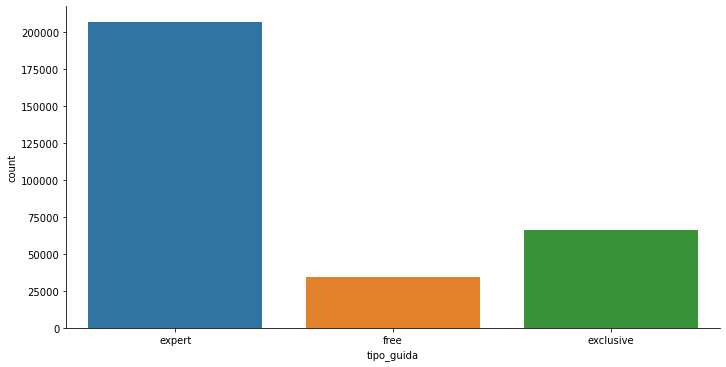

In [10]:
# Distribuzione del feature "tipo guida"
sns.factorplot(data=quotazioni_storiche, x = "tipo_guida", kind="count", size = 5, aspect = 2)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato per motifi di guida expert

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


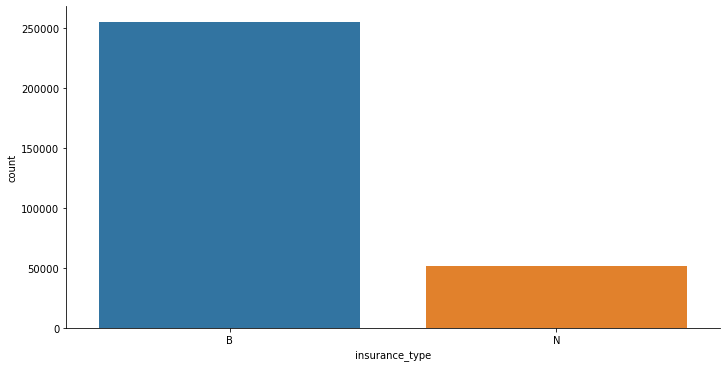

In [11]:
# Distribuzione del feature "insurance_type"
sns.factorplot(data=quotazioni_storiche, x = "insurance_type", kind="count", size = 5, aspect = 2)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato per tipo di assicurazione "B"

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


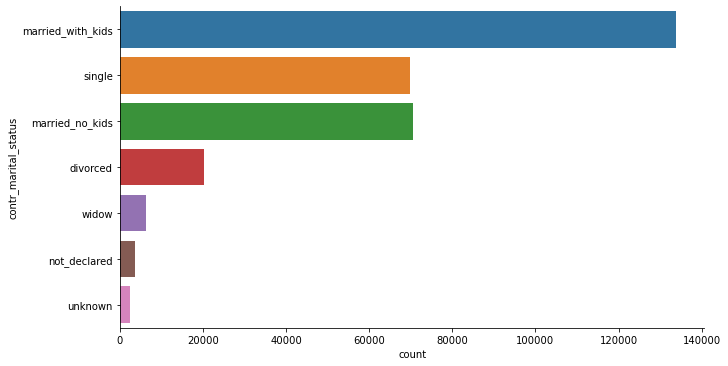

In [12]:
# Distribuzione del feature "contr_marital_status"
sns.factorplot(data=quotazioni_storiche, y = "contr_marital_status", kind="count", size = 5, aspect = 2)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato alle persone "sposati e con bambini" e uguale numero di persone "single" e "sposati senza bambini"

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


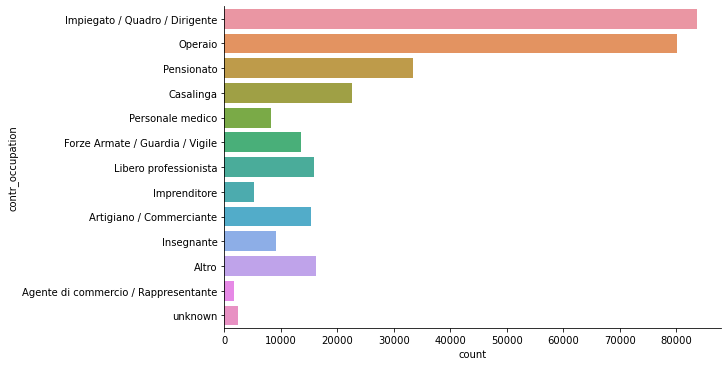

In [13]:
# Distribuzione del feature "contr_occupation"
sns.factorplot(data=quotazioni_storiche, y = "contr_occupation", kind="count", size = 5, aspect = 2)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato alle persone che sono dipendenti (Impiegato/Quadro/Dirigente e Operaio)

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


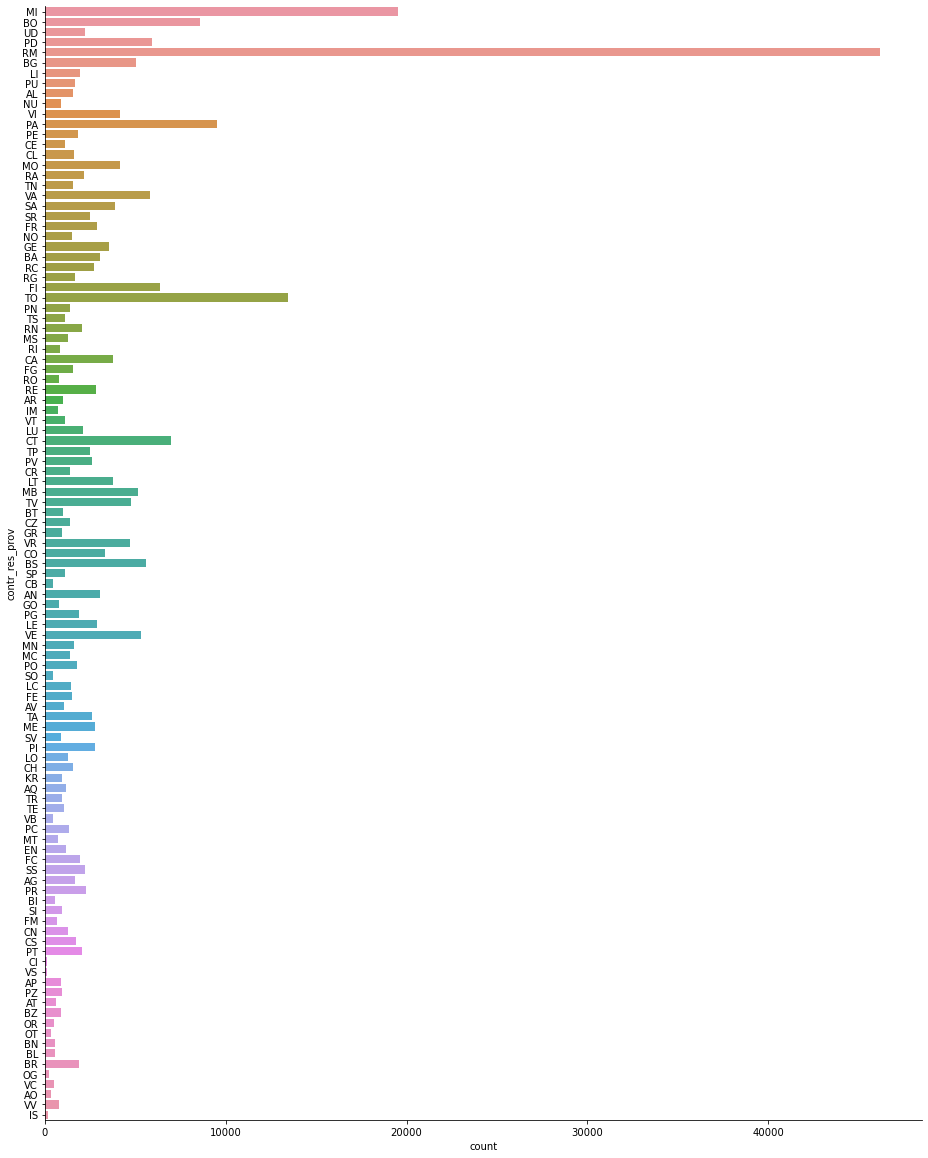

In [14]:
# Distribuzione del feature "contr_res_prov"
sns.factorplot(data=quotazioni_storiche, y = "contr_res_prov", kind="count", size = 16, aspect = 0.8)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato alle persone che hanno residenza nella provincia di Roma

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


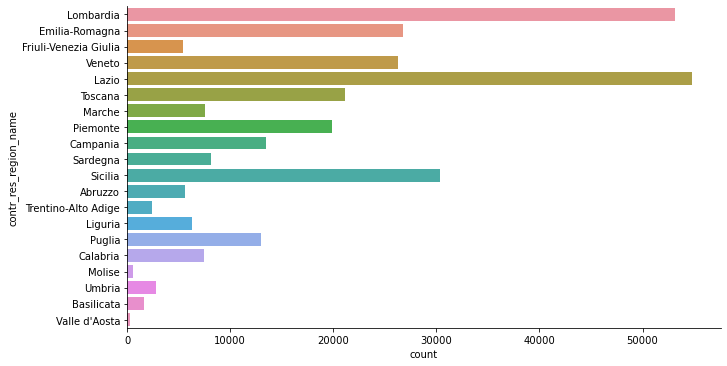

In [15]:
# Distribuzione del feature "contr_res_prov"
sns.factorplot(data=quotazioni_storiche, y = "contr_res_region_name", kind="count", size = 5, aspect = 2)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato alle persone che hanno Lombardia o Lazio come regione di residenza

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


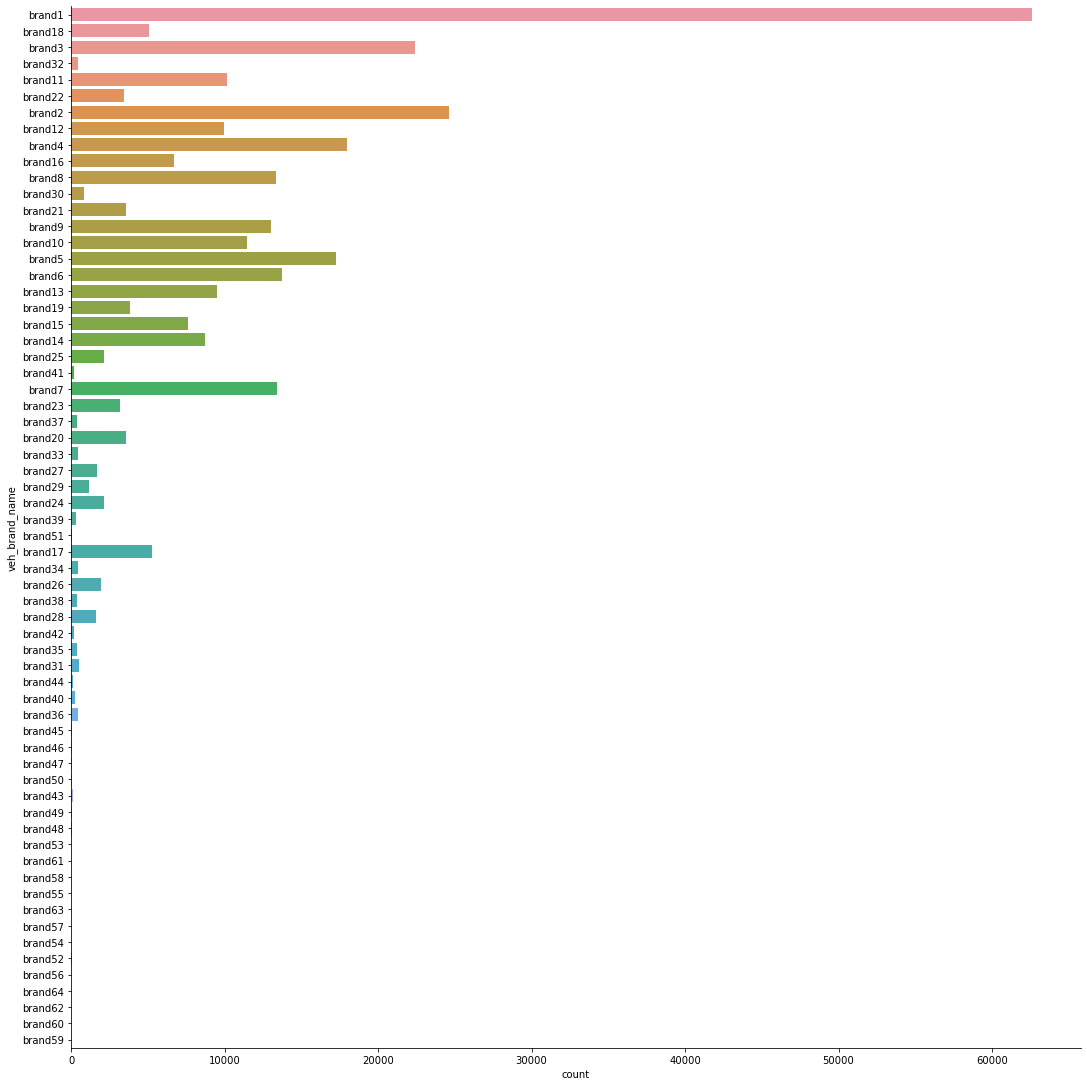

In [16]:
# Distribuzione del feature "veh_brand_name"
sns.factorplot(data=quotazioni_storiche, y = "veh_brand_name", kind="count", size = 15, aspect = 1)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato alle persone che hanno machina con brand name: brand1

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


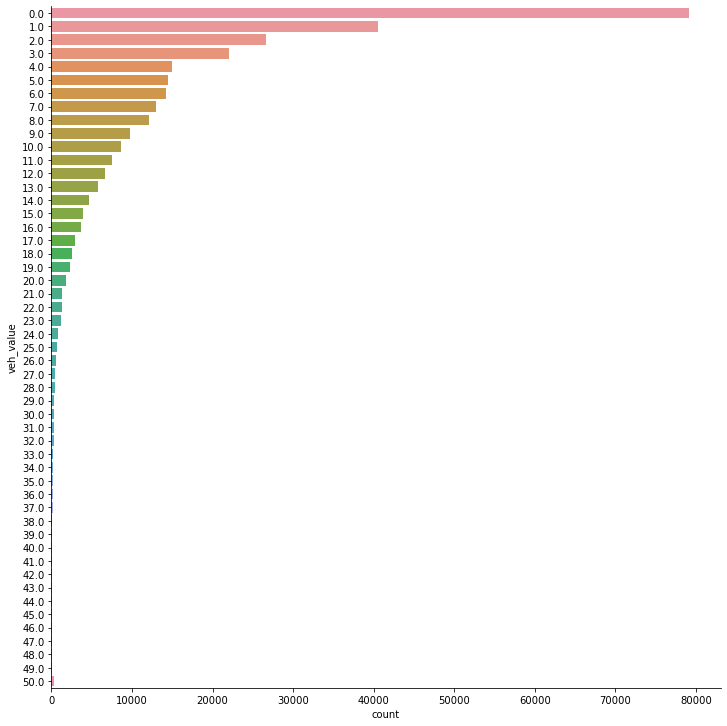

In [17]:
new_df=quotazioni_storiche.copy()
new_df['veh_value']=np.floor(new_df['veh_value'])//1000 # we use 5 to divide the vaule by 5 and select the integer part of the division
new_df['veh_value'].unique()
sns.factorplot(y="veh_value",kind="count", data=new_df, size = 10, aspect = 1)

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato per le machine che hanno un vallore tra 0 euro e 2000 euro.
Nel grafico ho creato dei bucket dove ogni bucket ha vallori di range 1000 euro, quindi per sapere il vallore approsimativo della machina si calcola cosi vallore = 1000*(bucket value).

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


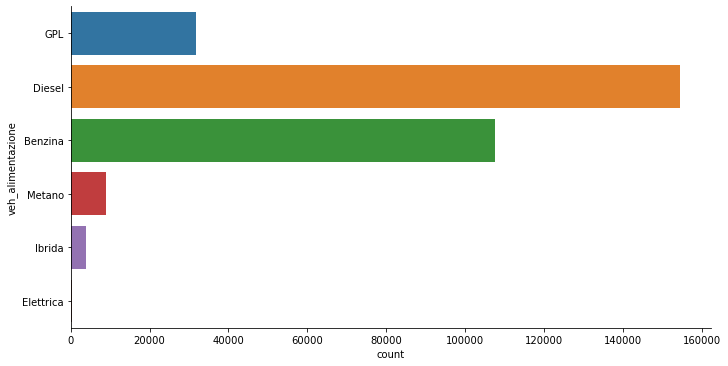

In [18]:
# Distribuzione del feature "veh_alimentazione"
sns.factorplot(data=quotazioni_storiche, y = "veh_alimentazione", kind="count", size = 5, aspect = 2)               

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato per le machine con allimentazione Diesel e Benzina

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


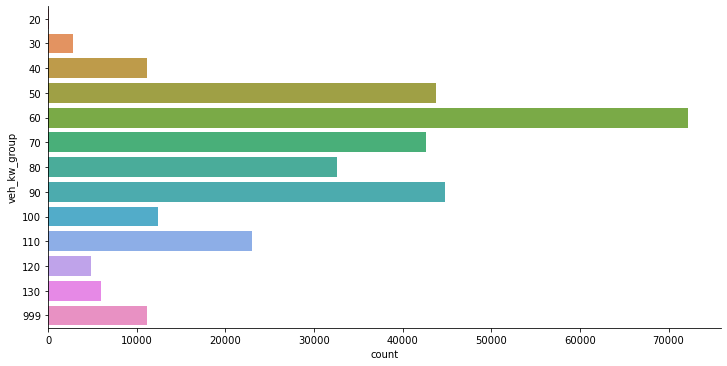

In [19]:
# Distribuzione del feature "veh_kw_group"
sns.factorplot(data=quotazioni_storiche, y = "veh_kw_group", kind="count", size = 5, aspect = 2)               

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato per le machine con potenza di 60KW e molto di meno per le machine con pocco potenza come 30KW o per machine con tanta potenza come 110KW o piu.

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


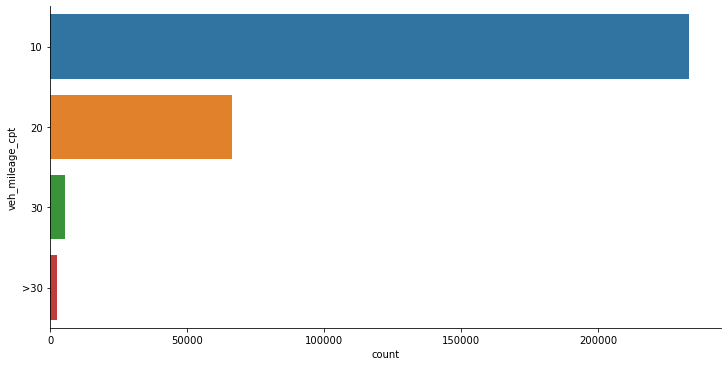

In [20]:
# Distribuzione del feature "veh_mileage_cpt"
sns.factorplot(data=quotazioni_storiche, y = "veh_mileage_cpt", kind="count", size = 5, aspect = 2)               

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato ai clienti che hanno traversato al massimo 10K kilometri durante l'ultimo anno

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


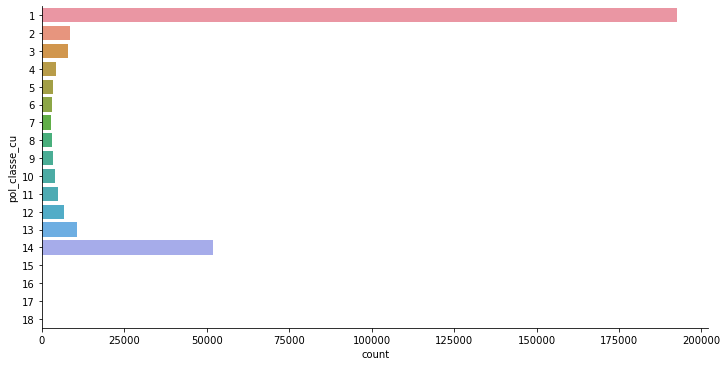

In [21]:
# Distribuzione del feature "pol_classe_cu"
sns.factorplot(data=quotazioni_storiche, y = "pol_classe_cu", kind="count", size = 5, aspect = 2)               

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato ai clienti che hanno una classe assicurativa 1(quella migliore) e classe 14 (quella iniziale per la prima machina)

C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


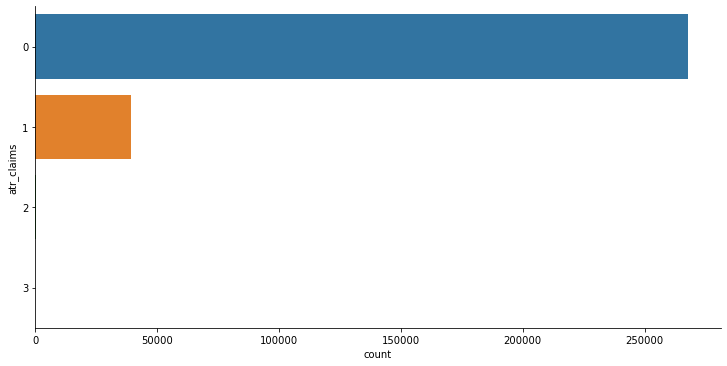

In [22]:
# Distribuzione del feature "atr_claims"
sns.factorplot(data=quotazioni_storiche, y = "atr_claims", kind="count", size = 5, aspect = 2)               

Dal grafico possiamo vedere che il maggior numero di polise assicurative è stato rilasciato ai clienti che non hanno fatto "claim" o hanno fatto al massimo 1 claim durante i ultimi 5 anni

# 4. Data transformation sui tre dataframe

## 4.1 dataframe "storico_rischi"

### a. Gestione vallori mancanti

### Ci sono vari metodi di gestire i campi con "nan" o "null" vallori:
#### 1. Elliminazioni delle rige con vallori mancanti
#### 2. Assegnazione dei valori mancanti con: Moda, Mean o Mediana dello feature
#### 3. Previsione dei valori mancanti dove il feature dipendente è il feature con i valori mancanti
#### 4. Uttilizo Algoritmi che lavorano bene anche quando abbiamo valori mancanti nel dataset (ex. Decision Trees, Random Forest Regressor, Naive Bayes Regressor,  Adaboost)

#### Per fare le cose semplice in questo caso uttilizero il metodo di imputation per i vallori mancanti sapendo che questo cambiera l'essito perche avremo un po di bias.

In [23]:
storico_rischi.isnull().sum()

data_quote                       0
data_decorrenza_richiesta        0
tipo_guida                       0
insurance_type                   0
contr_birth_date              6664
contr_license_year            8104
contr_marital_status             0
contr_occupation                 0
contr_res_prov               18316
contr_res_region_name            0
veh_registration_date            0
veh_purchase_date                0
veh_brand_name                   0
veh_doors_number                 0
veh_value                        0
veh_alimentazione                0
veh_consumption                 17
veh_kw_group                     0
veh_height                       0
veh_length                       0
veh_width                        0
veh_mass                        17
veh_mileage_cpt                  0
pol_classe_cu                    0
atr_claims                       0
risk                             0
dtype: int64

Abbiamo 5 feature che hanno valori mancanti: contr_birth_date, contr_license_year, contr_res_prov, veh_consumption, veh_mass, e per tutti uttilizero la mediana 

In [24]:
# Funzione per gestione valori mancanti con il metodo "Moda"(valore piu popolare nel feature)
def fill_nan_values_with_mode(df, feature):
    imputing = df[feature].mode()
    list(imputing)
    val = imputing[0]
    df[feature].fillna(value = val, inplace = True)
    return df

In [25]:
fill_nan_values_with_mode(storico_rischi, "contr_birth_date")
fill_nan_values_with_mode(storico_rischi, "contr_license_year")
fill_nan_values_with_mode(storico_rischi, "contr_res_prov")
fill_nan_values_with_mode(storico_rischi, "veh_consumption")
fill_nan_values_with_mode(storico_rischi, "veh_mass")

,data_quote,data_decorrenza_richiesta,tipo_guida,insurance_type,contr_birth_date,contr_license_year,contr_marital_status,contr_occupation,contr_res_prov,contr_res_region_name,...,veh_consumption,veh_kw_group,veh_height,veh_length,veh_width,veh_mass,veh_mileage_cpt,pol_classe_cu,atr_claims,risk
0,2020-01-23,2020-02-07,expert,B,1955-03-01,1973.0,married_no_kids,Pensionato,SA,Campania,...,5.3,60,1490,4065,1687,1105.0,10,1,0,0.00
1,2020-02-18,2020-02-24,exclusive,N,1966-02-01,1984.0,married_with_kids,Impiegato / Quadro / Dirigente,AN,Marche,...,5.7,110,1635,4355,1900,1670.0,10,14,0,0.00
2,2020-01-07,2020-01-23,exclusive,B,1969-04-01,1987.0,single,Operaio,VR,Veneto,...,6.2,70,1624,4052,1694,1369.0,10,1,0,0.00
3,2020-02-24,2020-03-22,expert,B,1948-12-01,1968.0,married_no_kids,Pensionato,RM,Lazio,...,6.0,40,1420,3337,1508,810.0,10,1,0,0.00
4,2020-02-04,2020-02-16,expert,B,1953-06-01,1972.0,married_with_kids,Pensionato,UD,Friuli-Venezia Giulia,...,4.8,60,1467,4257,1732,1079.0,10,1,0,1056.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828539,2020-11-19,2020-12-07,exclusive,B,1969-02-01,1987.0,married_no_kids,Operaio,VE,Veneto,...,4.1,70,1600,4248,1796,1395.0,20,1,0,0.00
828540,2020-06-12,2020-06-15,expert,B,1989-01-01,2011.0,married_with_kids,Operaio,SI,Toscana,...,4.5,60,1540,3715,1660,1115.0,10,10,0,0.00
828541,2020-12-03,2020-12-04,expert,B,1972-06-01,1990.0,married_no_kids,Impiegato / Quadro / Dirigente,RM,Lazio,...,3.6,80,1490,4157,1729,1150.0,20,1,0,0.00
828542,2020-12-27,2021-01-30,expert,B,1964-03-01,1982.0,married_no_kids,Forze Armate / Guardia / Vigile,LT,Lazio,...,4.2,60,1565,2695,1559,825.0,20,1,0,0.00


In [26]:
storico_rischi.isnull().sum()

data_quote                   0
data_decorrenza_richiesta    0
tipo_guida                   0
insurance_type               0
contr_birth_date             0
contr_license_year           0
contr_marital_status         0
contr_occupation             0
contr_res_prov               0
contr_res_region_name        0
veh_registration_date        0
veh_purchase_date            0
veh_brand_name               0
veh_doors_number             0
veh_value                    0
veh_alimentazione            0
veh_consumption              0
veh_kw_group                 0
veh_height                   0
veh_length                   0
veh_width                    0
veh_mass                     0
veh_mileage_cpt              0
pol_classe_cu                0
atr_claims                   0
risk                         0
dtype: int64

Non ci sono piu feature con campi mancanti

### b. Gestione feature categorici

Per essere in grado di uttlizare i nostri feature dobbiamo transformare tutti i valori testuali come numerichi, e per quello mottivo dobbiamo esseguire qualche encoding (one-hot encoding, label encoding, ecc)

Per evitare che il nostro dataset diventa molto largo uttilizero label encoding sapendo che puo creare un bias durante le nostre predizioni, ma per evitare il bias bisogna giocare un po e fare le prove per capire quale metodo è piu coretto.

In [27]:
# Selezionare i feature che si devono transoformare con valori string su valori numerici
featureToEncode = storico_rischi[["tipo_guida", "insurance_type", "contr_marital_status", "contr_occupation", "contr_res_prov", "contr_res_region_name", "veh_brand_name", "veh_alimentazione"]]
# Selezionare i feature che non si devono transofrmare e sono pronti di uttilizare
featureBuoni = storico_rischi.drop(["tipo_guida", "insurance_type", "contr_marital_status", "contr_occupation", "contr_res_prov", "contr_res_region_name", "veh_brand_name", "veh_alimentazione"], axis = 1)

In [28]:
# Applica il label encoder sui feature per encodare
fature_name = featureToEncode.columns
for f in fature_name:
    featureToEncode[f] = label_encode.fit_transform(featureToEncode[f].values)

<ipython-input-28-82c85d78d6c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureToEncode[f] = label_encode.fit_transform(featureToEncode[f].values)


Dopo questo ultimo passo dobbiamo solo collegare i due dataframe "featureToEncode" e "featureBuoni" in un dataframe "storico_rischi_df" dove tutti i feature sono pronti a uttilizare.

In [29]:
# Concatenare i due dataframe con feature encodati e feature che non hanno bisogno di transformare
storico_rischi_df = pd.concat([featureBuoni, featureToEncode],axis=1)

### c. Gestione i feature "date"

In [30]:
# Funzione per separare i campi che hanno valori "date" in tre diversi feature per giorno, mese e anno
def split_date(df):
    df.data_quote = pd.to_datetime(df.data_quote)
    df['day_data_quote'] = df.data_quote.dt.day
    df['month_data_quote'] = df.data_quote.dt.month
    df['year_data_quote'] = df.data_quote.dt.year
    df.drop(["data_quote"],inplace=True,axis=1)
    
    df.data_decorrenza_richiesta = pd.to_datetime(df.data_decorrenza_richiesta)
    df['day_data_decorrenza_richiesta'] = df.data_decorrenza_richiesta.dt.day
    df['month_data_decorrenza_richiesta'] = df.data_decorrenza_richiesta.dt.month
    df['year_data_decorrenza_richiesta'] = df.data_decorrenza_richiesta.dt.year
    df.drop(["data_decorrenza_richiesta"],inplace=True,axis=1)
    
    df.contr_birth_date = pd.to_datetime(df.contr_birth_date)
    df['day_contr_birth_date'] = df.contr_birth_date.dt.day
    df['month_contr_birth_date'] = df.contr_birth_date.dt.month
    df['year_contr_birth_date'] = df.contr_birth_date.dt.year
    df.drop(["contr_birth_date"],inplace=True,axis=1)
    
    df.veh_registration_date = pd.to_datetime(df.veh_registration_date)
    df['day_veh_registration_date'] = df.veh_registration_date.dt.day
    df['month_veh_registration_date'] = df.veh_registration_date.dt.month
    df['year_veh_registration_date'] = df.veh_registration_date.dt.year
    df.drop(["veh_registration_date"],inplace=True,axis=1)
    
    df.veh_purchase_date = pd.to_datetime(df.veh_purchase_date)
    df['day_veh_purchase_date'] = df.veh_purchase_date.dt.day
    df['month_veh_purchase_date'] = df.veh_purchase_date.dt.month
    df['year_veh_purchase_date'] = df.veh_purchase_date.dt.year
    df.drop(["veh_purchase_date"],inplace=True,axis=1)

In [31]:
# Applicare la funzione di splittare i feature "date"
split_date(storico_rischi_df)

### d. Gestione i alcuni feature speciali

In [32]:
# Funzione per transformare il feature contr_licence_year con data type integer
def contr_licence_year_new_feature(df):
    contr_license_year_new = df['contr_license_year'].astype(int)
    contr_license_year_new = pd.DataFrame(contr_license_year_new)
    df.drop(["contr_license_year"],inplace=True,axis=1)
    df = pd.concat([df, contr_license_year_new],axis=1)
    return df

In [33]:
# Applicare la funzione al feature  contr_licence_year
storico_rischi_df = contr_licence_year_new_feature(storico_rischi_df)

In [34]:
# Funzione per gestire due feature che hanno vallori non integer
def specific_feature_cleanup(df):  
    df.veh_doors_number[df.veh_doors_number == 'unknown'] = 0 
    df.veh_doors_number[df.veh_doors_number == '0'] = 0 
    df.veh_doors_number[df.veh_doors_number == '2'] = 2
    df.veh_doors_number[df.veh_doors_number == '3'] = 3
    df.veh_doors_number[df.veh_doors_number == '4'] = 4
    df.veh_doors_number[df.veh_doors_number == '5'] = 5
    df.veh_mileage_cpt[df.veh_mileage_cpt == '>30'] = 31

In [35]:
# Applicare la funzione ai feature specifici
specific_feature_cleanup(storico_rischi_df)

<ipython-input-34-85dde85de506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == 'unknown'] = 0
<ipython-input-34-85dde85de506>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == '0'] = 0
<ipython-input-34-85dde85de506>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == '2'] = 2
<ipython-input-34-85dde85de506>:6:

## 4.2 dataframe "quotazioni_storiche"

le stesse operazioni che ho fatto sul dataframe "storico_rischi" devo fare anche per i  dataframe "quotazioni_storiche" e "quotazioni" per avere i due dataframe pronti quando faro le predizioni.

### a. Gestione vallori mancanti

In [36]:
quotazioni_storiche.isnull().sum()

data_quote                      0
data_decorrenza_richiesta       0
tipo_guida                      0
insurance_type                  0
contr_birth_date             2448
contr_license_year           2955
contr_marital_status            0
contr_occupation                0
contr_res_prov               6889
contr_res_region_name           0
veh_registration_date           0
veh_purchase_date               0
veh_brand_name                  0
veh_doors_number                0
veh_value                       0
veh_alimentazione               0
veh_consumption                 5
veh_kw_group                    0
veh_height                      0
veh_length                      0
veh_width                       0
veh_mass                        5
veh_mileage_cpt                 0
pol_classe_cu                   0
atr_claims                      0
best_price                      0
dtype: int64

Anche qui abbiamo 5 feature che hanno valori mancanti: contr_birth_date, contr_license_year, contr_res_prov, veh_consumption, veh_mass, e per tutti uttilizero la mediana 

In [37]:
fill_nan_values_with_mode(quotazioni_storiche, "contr_birth_date")
fill_nan_values_with_mode(quotazioni_storiche, "contr_license_year")
fill_nan_values_with_mode(quotazioni_storiche, "contr_res_prov")
fill_nan_values_with_mode(quotazioni_storiche, "veh_consumption")
fill_nan_values_with_mode(quotazioni_storiche, "veh_mass")

,data_quote,data_decorrenza_richiesta,tipo_guida,insurance_type,contr_birth_date,contr_license_year,contr_marital_status,contr_occupation,contr_res_prov,contr_res_region_name,...,veh_consumption,veh_kw_group,veh_height,veh_length,veh_width,veh_mass,veh_mileage_cpt,pol_classe_cu,atr_claims,best_price
0,2020-03-04,2020-03-15,expert,B,1970-01-01,1988.0,married_with_kids,Impiegato / Quadro / Dirigente,MI,Lombardia,...,6.7,70,1498,4336,1792,1280.0,10,1,0,455.46
1,2020-02-20,2020-03-16,expert,B,1975-01-01,1993.0,married_with_kids,Operaio,BO,Emilia-Romagna,...,5.6,90,1635,4440,1855,1490.0,10,1,0,523.36
2,2020-02-10,2020-02-21,expert,B,1973-01-01,1991.0,single,Impiegato / Quadro / Dirigente,UD,Friuli-Venezia Giulia,...,5.1,90,1573,4234,1819,1270.0,10,1,0,516.91
3,2020-01-04,2020-02-07,expert,B,1955-03-01,1974.0,married_with_kids,Impiegato / Quadro / Dirigente,PD,Veneto,...,6.5,120,1488,3657,1627,1110.0,10,1,0,446.29
4,2020-02-06,2020-03-12,expert,B,1983-12-01,2001.0,married_no_kids,Operaio,RM,Lazio,...,5.2,110,1590,4385,1831,1520.0,10,6,0,783.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307123,2020-12-23,2021-01-05,expert,N,1983-07-01,2002.0,single,Impiegato / Quadro / Dirigente,RN,Emilia-Romagna,...,4.9,70,1584,4108,1760,1245.0,10,14,0,974.24
307124,2020-06-09,2020-06-10,expert,B,1979-05-01,2007.0,married_with_kids,Casalinga,MI,Lombardia,...,7.8,110,1805,4925,1900,2175.0,10,17,0,875.30
307125,2020-06-12,2020-06-12,expert,B,1977-07-01,1996.0,married_with_kids,Impiegato / Quadro / Dirigente,LO,Lombardia,...,4.5,80,1421,4238,1765,1325.0,10,4,1,551.37
307126,2020-11-26,2020-12-05,expert,B,1975-04-01,1993.0,married_no_kids,Impiegato / Quadro / Dirigente,RM,Lazio,...,5.7,70,1490,4065,1687,1100.0,20,1,0,484.24


In [38]:
quotazioni_storiche.isnull().sum()

data_quote                   0
data_decorrenza_richiesta    0
tipo_guida                   0
insurance_type               0
contr_birth_date             0
contr_license_year           0
contr_marital_status         0
contr_occupation             0
contr_res_prov               0
contr_res_region_name        0
veh_registration_date        0
veh_purchase_date            0
veh_brand_name               0
veh_doors_number             0
veh_value                    0
veh_alimentazione            0
veh_consumption              0
veh_kw_group                 0
veh_height                   0
veh_length                   0
veh_width                    0
veh_mass                     0
veh_mileage_cpt              0
pol_classe_cu                0
atr_claims                   0
best_price                   0
dtype: int64

### b. Gestione feature categorici

Anche qui per essere in grado di uttlizare i nostri feature dobbiamo transformare tutti i valori testuali in numerichi, e per quello mottivo dobbiamo esseguire encoding, in nostro caso label encoding

In [39]:
# Selezionare i feature che si devono transoformare con valori string su valori numerici
quotStoriche_featureToEncode = quotazioni_storiche[["tipo_guida", "insurance_type", "contr_marital_status", "contr_occupation", "contr_res_prov", "contr_res_region_name", "veh_brand_name", "veh_alimentazione"]]
# Selezionare i feature che non si devono transofrmare e sono pronti di uttilizare
quotStoriche_featureBuoni = quotazioni_storiche.drop(["tipo_guida", "insurance_type", "contr_marital_status", "contr_occupation", "contr_res_prov", "contr_res_region_name", "veh_brand_name", "veh_alimentazione"], axis = 1)

In [40]:
# Applica il label encoder sui feature per encodare
fature_name = quotStoriche_featureToEncode.columns
for f in fature_name:
    quotStoriche_featureToEncode[f] = label_encode.fit_transform(quotStoriche_featureToEncode[f].values)

<ipython-input-40-b70e9db6975e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotStoriche_featureToEncode[f] = label_encode.fit_transform(quotStoriche_featureToEncode[f].values)


Dopo questo ultimo passo dobbiamo solo collegare i due dataframe "quotStoriche_featureToEncode" e "quotStoriche_featureBuoni" in un dataframe "quotazioni_storiche_df" dove tutti i feature sono pronti a uttilizare.

In [41]:
quotazioni_storiche_df = pd.concat([quotStoriche_featureBuoni, quotStoriche_featureToEncode],axis=1)

### c. Gestione i feature "date"

In [42]:
split_date(quotazioni_storiche_df)

### d. Gestione i alcuni feature speciali

In [43]:
quotazioni_storiche_df = contr_licence_year_new_feature(quotazioni_storiche_df)

In [44]:
specific_feature_cleanup(quotazioni_storiche_df)

<ipython-input-34-85dde85de506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == 'unknown'] = 0
<ipython-input-34-85dde85de506>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == '0'] = 0
<ipython-input-34-85dde85de506>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == '2'] = 2
<ipython-input-34-85dde85de506>:6:

## 4.3 dataframe "quotazioni"

### a. Gestione vallori mancanti

In [45]:
quotazioni.isnull().sum()

data_quote                      0
data_decorrenza_richiesta       0
tipo_guida                      0
insurance_type                  0
contr_birth_date             1603
contr_license_year           1975
contr_marital_status            0
contr_occupation                0
contr_res_prov               4539
contr_res_region_name           0
veh_registration_date           0
veh_purchase_date               0
veh_brand_name                  0
veh_doors_number                0
veh_value                       0
veh_alimentazione               0
veh_consumption                 4
veh_kw_group                    0
veh_height                      0
veh_length                      0
veh_width                       0
veh_mass                        4
veh_mileage_cpt                 0
pol_classe_cu                   0
atr_claims                      0
dtype: int64

Anche qui abbiamo 5 feature che hanno valori mancanti: contr_birth_date, contr_license_year, contr_res_prov, veh_consumption, veh_mass, e per tutti uttilizero la mediana 

In [46]:
fill_nan_values_with_mode(quotazioni, "contr_birth_date")
fill_nan_values_with_mode(quotazioni, "contr_license_year")
fill_nan_values_with_mode(quotazioni, "contr_res_prov")
fill_nan_values_with_mode(quotazioni, "veh_consumption")
fill_nan_values_with_mode(quotazioni, "veh_mass")

,data_quote,data_decorrenza_richiesta,tipo_guida,insurance_type,contr_birth_date,contr_license_year,contr_marital_status,contr_occupation,contr_res_prov,contr_res_region_name,...,veh_alimentazione,veh_consumption,veh_kw_group,veh_height,veh_length,veh_width,veh_mass,veh_mileage_cpt,pol_classe_cu,atr_claims
0,2020-02-06,2020-03-07,exclusive,B,1972-04-01,1990.0,married_with_kids,Impiegato / Quadro / Dirigente,BR,Puglia,...,Diesel,5.9,110,1517,4774,1820,1585.0,10,1,0
1,2020-01-22,2020-01-25,expert,B,1965-12-01,1984.0,married_with_kids,Operaio,MB,Lombardia,...,Diesel,4.7,90,1702,4524,1838,1614.0,10,1,0
2,2020-02-23,2020-03-11,expert,B,1967-07-01,1986.0,married_with_kids,Forze Armate / Guardia / Vigile,PD,Veneto,...,Benzina,6.0,40,1420,3337,1508,810.0,10,1,0
3,2020-02-28,2020-02-28,expert,B,1979-11-01,1997.0,married_no_kids,Impiegato / Quadro / Dirigente,VA,Lombardia,...,Diesel,4.2,60,1488,3546,1627,1055.0,10,1,0
4,2020-01-03,2020-01-09,exclusive,B,1983-09-01,2002.0,married_no_kids,Libero professionista,RM,Lazio,...,Diesel,3.7,80,1556,4159,1739,1235.0,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205260,2020-06-05,2020-06-18,expert,B,1983-06-01,2001.0,married_with_kids,Operaio,RM,Lazio,...,Diesel,5.1,90,1436,4699,1826,1600.0,10,1,0
205261,2020-12-09,2020-12-09,expert,B,1968-04-01,1986.0,married_with_kids,Impiegato / Quadro / Dirigente,RG,Sicilia,...,Diesel,4.4,70,1493,3986,1707,1250.0,10,1,0
205262,2020-06-05,2020-06-18,expert,N,1959-02-01,1983.0,married_with_kids,Altro,BR,Puglia,...,Benzina,6.0,50,1510,3860,1667,1085.0,10,14,0
205263,2020-06-09,2020-06-09,expert,N,1991-09-01,2011.0,married_no_kids,Libero professionista,GR,Toscana,...,GPL,5.1,50,1551,3640,1597,1015.0,20,14,0


In [47]:
quotazioni.isnull().sum()

data_quote                   0
data_decorrenza_richiesta    0
tipo_guida                   0
insurance_type               0
contr_birth_date             0
contr_license_year           0
contr_marital_status         0
contr_occupation             0
contr_res_prov               0
contr_res_region_name        0
veh_registration_date        0
veh_purchase_date            0
veh_brand_name               0
veh_doors_number             0
veh_value                    0
veh_alimentazione            0
veh_consumption              0
veh_kw_group                 0
veh_height                   0
veh_length                   0
veh_width                    0
veh_mass                     0
veh_mileage_cpt              0
pol_classe_cu                0
atr_claims                   0
dtype: int64

### b. Gestione feature categorici

Anche qui per essere in grado di uttlizare i nostri feature dobbiamo transformare tutti i valori testuali in numerichi, e per quello mottivo dobbiamo esseguire encoding, in nostro caso label encoding

In [48]:
# Selezionare i feature che si devono transoformare con valori string su valori numerici
quot_featureToEncode = quotazioni[["tipo_guida", "insurance_type", "contr_marital_status", "contr_occupation", "contr_res_prov", "contr_res_region_name", "veh_brand_name", "veh_alimentazione"]]
# Selezionare i feature che non si devono transofrmare e sono pronti di uttilizare
quot_featureBuoni = quotazioni.drop(["tipo_guida", "insurance_type", "contr_marital_status", "contr_occupation", "contr_res_prov", "contr_res_region_name", "veh_brand_name", "veh_alimentazione"], axis = 1)

In [49]:
# Applica il label encoder sui feature per encodare
fature_name = quot_featureToEncode.columns
for f in fature_name:
    quot_featureToEncode[f] = label_encode.fit_transform(quot_featureToEncode[f].values)

<ipython-input-49-20a72eb63c40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quot_featureToEncode[f] = label_encode.fit_transform(quot_featureToEncode[f].values)


Dopo questo ultimo passo dobbiamo solo collegare i due dataframe "quot_featureToEncode" e "quot_featureBuoni" in un dataframe "quotazionie_df" dove tutti i feature sono pronti a uttilizare.

In [50]:
quotazioni_df = pd.concat([quot_featureBuoni, quot_featureToEncode],axis=1)

### c. Gestione i feature "date"

In [51]:
split_date(quotazioni_df)

### d. Gestione i alcuni feature speciali

In [52]:
quotazioni_df = contr_licence_year_new_feature(quotazioni_df)

In [53]:
specific_feature_cleanup(quotazioni_df)

<ipython-input-34-85dde85de506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == 'unknown'] = 0
<ipython-input-34-85dde85de506>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == '0'] = 0
<ipython-input-34-85dde85de506>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.veh_doors_number[df.veh_doors_number == '2'] = 2
<ipython-input-34-85dde85de506>:6:

### Ora abbiamo i nostri dataset pronti per procedere con le nostre preidzioni

# 5. Creazione e implementazione modeli Machine Learning

#### Questa parte sara fatta in 5 passi:
#### 1. Train e test un modello ML sul dataframe "storico_rischi_df" per trovare il "risk" della polisa asicurativa
#### 2. Fare una predizione del "risk" per le polise asicurative nel dataframe "quotazioni_storiche_df" e aggiungere il feature "predicted_risk" al dataframe  "quotazioni_storiche_df"
#### 3. Train e test un altro modello ML sul dataframe "quotazioni_storiche_df" per trovare il "best price" della polisa asicurativa
#### 4. Fare una predizione con il primo modelo del "risk" per le polise asicurative nel dataframe "quotazioni" e aggiungere il feature "predicted_risk" al dataframe  "quotazioni"
#### 5. Fare una predizione con il secondo modelo del "best price" le polise asicurative sul dataframe "quotazioni" e salvare l'esito in un CSV file

Sellezionare i feature neccesari e separare il dataset storico_rischi_df su training e testing dataset

In [54]:
# Lista di feature che sono piu uttili per le nostre predizioni
features = ['veh_doors_number', 'veh_value', 'veh_kw_group', 'veh_height', 'veh_length', 'veh_width', 'veh_mass', 'veh_mileage_cpt', 'pol_classe_cu', 'atr_claims', 'tipo_guida', 'insurance_type','contr_marital_status', 'contr_occupation', 'contr_res_prov', 'contr_res_region_name', 'veh_brand_name', 'veh_alimentazione','year_contr_birth_date', 'year_veh_registration_date', 'year_veh_purchase_date', 'contr_license_year']
# Feature dependente
y = storico_rischi_df.risk
# Split del dataset su training e testing, test size 30%
x_train, x_test, y_train, y_test = train_test_split(storico_rischi_df[features], y, test_size=0.3, random_state=0)

### 1. Primo modelo ML training e testing sul dataframe "storico_rischi_df"

In [ ]:
# Ho scelto di uttilizare l'algoritmo Random Forest Regrsssor con gli hyperparameters che hanno mostrato il migliore risultato
model_risk = RandomForestRegressor(bootstrap = True, max_depth = 80, max_features = 20, min_samples_leaf = 5, min_samples_split = 12, n_estimators = 100)
model_name = ["RandomForestRegressor"]

# Applicare il model per fare il training
model_risk.fit(x_train,y_train)
print("The model", *model_name, "have been trained on the training dataset!")

In [ ]:
# Test il primo ML model sul testing dataset
rmsle=[]
d={}
model_name = ["RandomForestRegressor"]
test_pred=model_risk.predict(x_test)    
rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
print("The model have been tested on the test dataset.")
d = {'Algorithm':model_name,'RMSLE':rmsle}  
rmsle_frame = pd.DataFrame(d)
print(rmsle_frame)

### 2. Uttilizo del primo modelo ML per fare la predizione del "risk" per le polise assicurative nel dataframe "quotazioni_storiche_df"

In [ ]:
# Lista di feature che sono piu uttili per le nostre predizioni
features = ['veh_doors_number', 'veh_value', 'veh_kw_group', 'veh_height', 'veh_length', 'veh_width', 'veh_mass', 'veh_mileage_cpt', 'pol_classe_cu', 'atr_claims', 'tipo_guida', 'insurance_type','contr_marital_status', 'contr_occupation', 'contr_res_prov', 'contr_res_region_name', 'veh_brand_name', 'veh_alimentazione','year_contr_birth_date', 'year_veh_registration_date', 'year_veh_purchase_date', 'contr_license_year']
X_pred = quotazioni_storiche_df[features]

# Predizione del risk 
prediction_risk = model.predict(X_pred)

In [ ]:
# Transformazione del esito da una lista in un dataframe e rinominare il dataframe come "predicted_risk"
feature_risk = pd.DataFrame(prediction_risk)
feature_risk.rename(columns = {0:'predicted_risk'}, inplace = True)

Prima dobbiamo aggiungere il feature risk che abbiamo trovato nel step 2, perche ora utilizeremo questo dataframe per creare il modelo ML che sara uttilizato per trovare il "best price" sul dataframe "quotazionie_df"

In [ ]:
quotazioni_storiche_con_risk_df = pd.concat([quotazioni_storiche_df, feature_risk],axis=1)

Sellezionare i feature neccesari e separare il dataset storico_rischi_df su training e test dataset

In [ ]:
# Lista di feature che sono piu uttili per le nostre predizioni
features = ['veh_doors_number', 'veh_value', 'veh_kw_group', 'veh_height', 'veh_length', 'veh_width', 'veh_mass', 'veh_mileage_cpt', 'pol_classe_cu', 'atr_claims', 'tipo_guida', 'insurance_type','contr_marital_status', 'contr_occupation', 'contr_res_prov', 'contr_res_region_name', 'veh_brand_name', 'veh_alimentazione','year_contr_birth_date', 'year_veh_registration_date', 'year_veh_purchase_date', 'contr_license_year','predicted_risk']
# Feature dependente
y2 = quotazioni_storiche_con_risk_df.best_price

# Split del dataset su training e testing, test size 30%
x_train2, x_test2, y_train2, y_test2 = train_test_split(quotazioni_storiche_con_risk_df[features], y2, test_size=0.3, random_state=0)

### 3. Secondo modello ML training e testing sul dataframe "quotazioni_storiche_df" per trovare il "best price"

In [ ]:
# Ho scelto di uttilizare l'algoritmo Random Forest Regrsssor con gli hyperparameters che hanno mostrato il migliore risultato
model_best_price = RandomForestRegressor(bootstrap = True, max_depth = 80, max_features = 20, min_samples_leaf = 5, min_samples_split = 12, n_estimators = 100)
model_name = ["RandomForestRegressor"]

# Applicare il model per fare il training
model_best_price.fit(x_train2,y_train2)
print("The model", model_name, "have been trained on the training dataset!")

In [ ]:
# Test il primo ML model sul testing dataset
rmsle=[]
d={}
model_name = ["RandomForestRegressor"]
test_pred2 = model_best_price.predict(x_test2)    
rmsle.append(np.sqrt(mean_squared_log_error(test_pred2, y_test2)))
print("The model have been tested on the test dataset.")
d = {'Algorithm':model_name,'RMSLE':rmsle}  
rmsle_frame = pd.DataFrame(d)
print(rmsle_frame)

### 4. Uttilizo del primo modelo ML per fare la predizione del "risk" per le polise assicurative nel dataframe "quotazioni_df"

In [ ]:
# Ho scelto di uttilizare l'algoritmo Random Forest Regrsssor con gli hyperparameters che hanno mostrato il migliore risultato
features_risk = ['veh_doors_number', 'veh_value', 'veh_kw_group', 'veh_height', 'veh_length', 'veh_width', 'veh_mass', 'veh_mileage_cpt', 'pol_classe_cu', 'atr_claims', 'tipo_guida', 'insurance_type','contr_marital_status', 'contr_occupation', 'contr_res_prov', 'contr_res_region_name', 'veh_brand_name', 'veh_alimentazione','year_contr_birth_date', 'year_veh_registration_date', 'year_veh_purchase_date', 'contr_license_year']
x_pred_risk = quotazioni_df[features_risk]

# Predizione del risk 
prediction_risk = model_risk.predict(x_pred_risk)

# Transformazione del esito da una lista in un dataframe e rinominare il dataframe come "predicted_risk"
prediction_risk = pd.DataFrame(prediction_risk)
prediction_risk.rename(columns = {0:'predicted_risk'}, inplace = True)
quotazioni_con_risk_df = pd.concat([quotazioni_df, prediction_risk],axis=1)

### 5. Uttilizo del secondo modelo ML per fare la predizione del "best_price" per le polise assicurative nel dataframe "quotazioni_df"

In [ ]:
# Ho scelto di uttilizare l'algoritmo Random Forest Regrsssor con gli hyperparameters che hanno mostrato il migliore risultato
features_best_price = ['veh_doors_number', 'veh_value', 'veh_kw_group', 'veh_height', 'veh_length', 'veh_width', 'veh_mass', 'veh_mileage_cpt', 'pol_classe_cu', 'atr_claims', 'tipo_guida', 'insurance_type','contr_marital_status', 'contr_occupation', 'contr_res_prov', 'contr_res_region_name', 'veh_brand_name', 'veh_alimentazione','year_contr_birth_date', 'year_veh_registration_date', 'year_veh_purchase_date', 'contr_license_year', 'predicted_risk']
x_pred_best_price = quotazioni_con_risk_df[features_best_price]

# Predizione del risk 
prediction_best_price = model_best_price.predict(x_pred_best_price)

# Transformazione del esito da una lista in un dataframe e rinominare il dataframe come "predicted_best_price"
prediction_best_price = pd.DataFrame(prediction_best_price)
prediction_best_price.rename(columns = {0:'predicted_best_price'}, inplace = True)

### 6. Salvare l'esito in un CSV file

In [ ]:
prediction_best_price.to_csv("predicted_best_price.csv")